In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
Retail=pd.read_csv("C:/Users/hp/Downloads/Retail_Transaction_Dataset.csv")
Retail

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
...,...,...,...,...,...,...,...,...,...,...
99995,726461,A,2,56.078258,7/17/2023 16:59,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
99996,328056,A,6,88.516406,5/30/2023 9:04,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
99997,887304,B,4,72.385564,8/25/2023 7:59,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472
99998,326401,C,5,66.542239,2/5/2024 19:45,PayPal,"18756 Mcfarland Way Suite 866\nBarnettside, PR...",Electronics,14.345018,284.983717


In [31]:
Retail['TotalAmount']=Retail['TotalAmount'].round()

In [32]:
Retail['TotalAmount'].sum()

24833544.0

In [33]:
Retail.columns

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory',
       'DiscountApplied(%)', 'TotalAmount'],
      dtype='object')

In [34]:
Retail["TransactionDate"]=pd.to_datetime(Retail["TransactionDate"])

In [35]:
Retail["Day_Name"]=Retail["TransactionDate"].dt.day_name()
Dayname=Retail.groupby("Day_Name")["TotalAmount"].sum().round()

In [36]:
Dayname

Day_Name
Friday       3547950.0
Monday       3493458.0
Saturday     3581329.0
Sunday       3535335.0
Thursday     3604946.0
Tuesday      3529873.0
Wednesday    3540653.0
Name: TotalAmount, dtype: float64

In [37]:
Name=Dayname.index
Number=Dayname.values

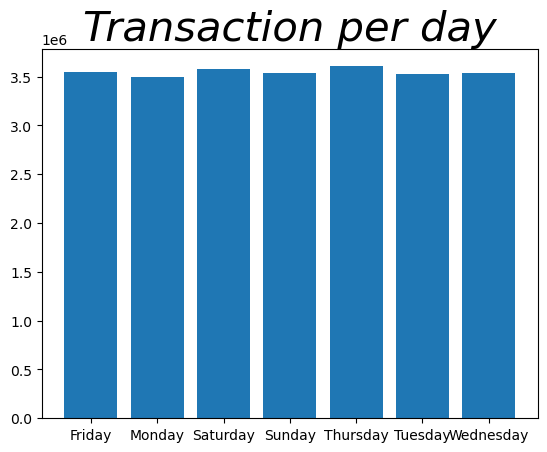

In [57]:
plt.bar(Name,Number)
plt.title("Transaction per day",fontsize=30,fontstyle='italic')
plt.savefig("transaction per day")
plt.show()

In [58]:
Retail["Month_Name"]=Retail["TransactionDate"].dt.month_name()
Month_Name=Retail.groupby("Month_Name")["TotalAmount"].sum().round()
Month_Name

Month_Name
April        1939213.0
August       2109339.0
December     2125633.0
February     1973136.0
January      2128345.0
July         2132559.0
June         2066412.0
March        2108245.0
May          2099543.0
November     2051324.0
October      2049491.0
September    2050304.0
Name: TotalAmount, dtype: float64

In [41]:
Name1=Month_Name.index
Number1=Month_Name.values

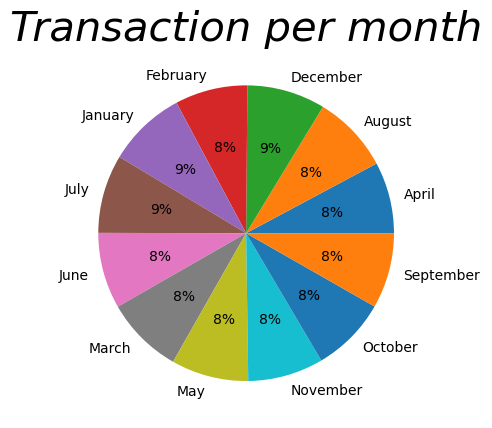

In [59]:
plt.pie(Number1,labels=Name1,autopct="%1.0f%%")
plt.title("Transaction per month",fontsize=30,fontstyle='italic')
plt.savefig("transaction per month")
plt.show()

In [43]:
Retail["Quarter"]=Retail["TransactionDate"].dt.quarter
quarter=Retail.groupby("Quarter")["TotalAmount"].sum().round()

In [44]:
quarter

Quarter
1    6209726.0
2    6105168.0
3    6292202.0
4    6226448.0
Name: TotalAmount, dtype: float64

In [45]:
Name2=quarter.index
Number2=quarter.values

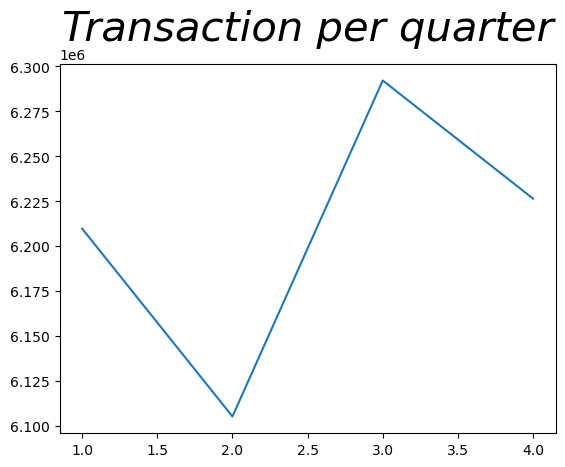

In [60]:
plt.plot(Name2,Number2)
plt.title("Transaction per quarter",fontsize=30,fontstyle='italic')
plt.savefig("transaction per quarter")
plt.show()

In [47]:
Retail["Year"]=Retail["TransactionDate"].dt.year
year=Retail.groupby("Year")["TotalAmount"].sum().round()
year

Year
2023    16745441.0
2024     8088103.0
Name: TotalAmount, dtype: float64

In [48]:
Name3=year.index
Number3=year.values

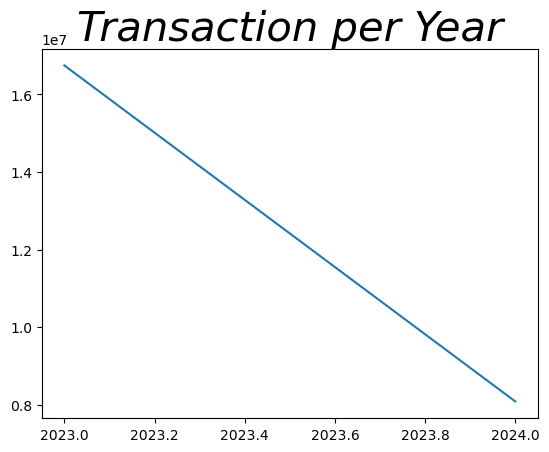

In [62]:
plt.plot(Name3,Number3)
plt.title("Transaction per Year",fontsize=30,fontstyle='italic')
plt.savefig("trans per year")
plt.show()

In [50]:
Revenue=Retail.groupby("ProductCategory")["TotalAmount"].sum().round()
Revenue

ProductCategory
Books          6257835.0
Clothing       6205536.0
Electronics    6196804.0
Home Decor     6173369.0
Name: TotalAmount, dtype: float64

In [51]:
Name4=Revenue.index
Number4=Revenue.values

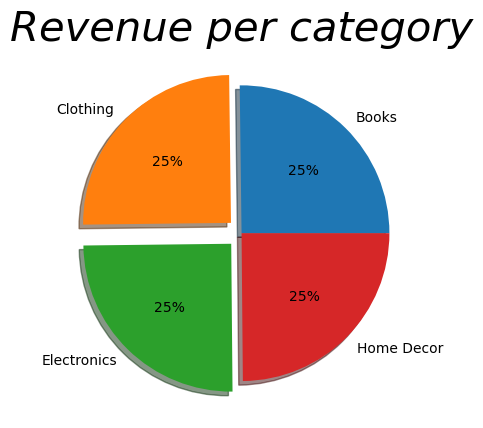

In [63]:
plt.pie(Number4,labels=Name4,autopct="%1.0f%%",shadow=True,explode=[0,0.1,0.1,0])
plt.title("Revenue per category",fontsize=30,fontstyle='italic')
plt.savefig("revenue")
plt.show()

In [53]:
Payment=Retail.groupby("PaymentMethod")["TotalAmount"].sum().round()
Payment

PaymentMethod
Cash           6207162.0
Credit Card    6203588.0
Debit Card     6203059.0
PayPal         6219735.0
Name: TotalAmount, dtype: float64

In [54]:
Name5=Payment.index
Number5=Payment.values

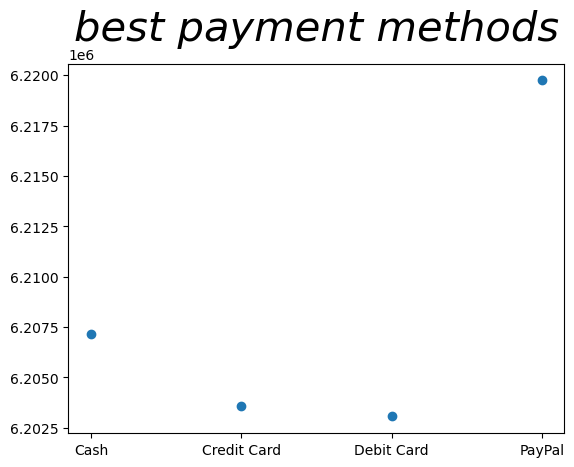

In [64]:
plt.scatter(Name5,Number5)
plt.title("best payment methods",fontsize=30,fontstyle='italic')
plt.savefig("payment method")
plt.show()

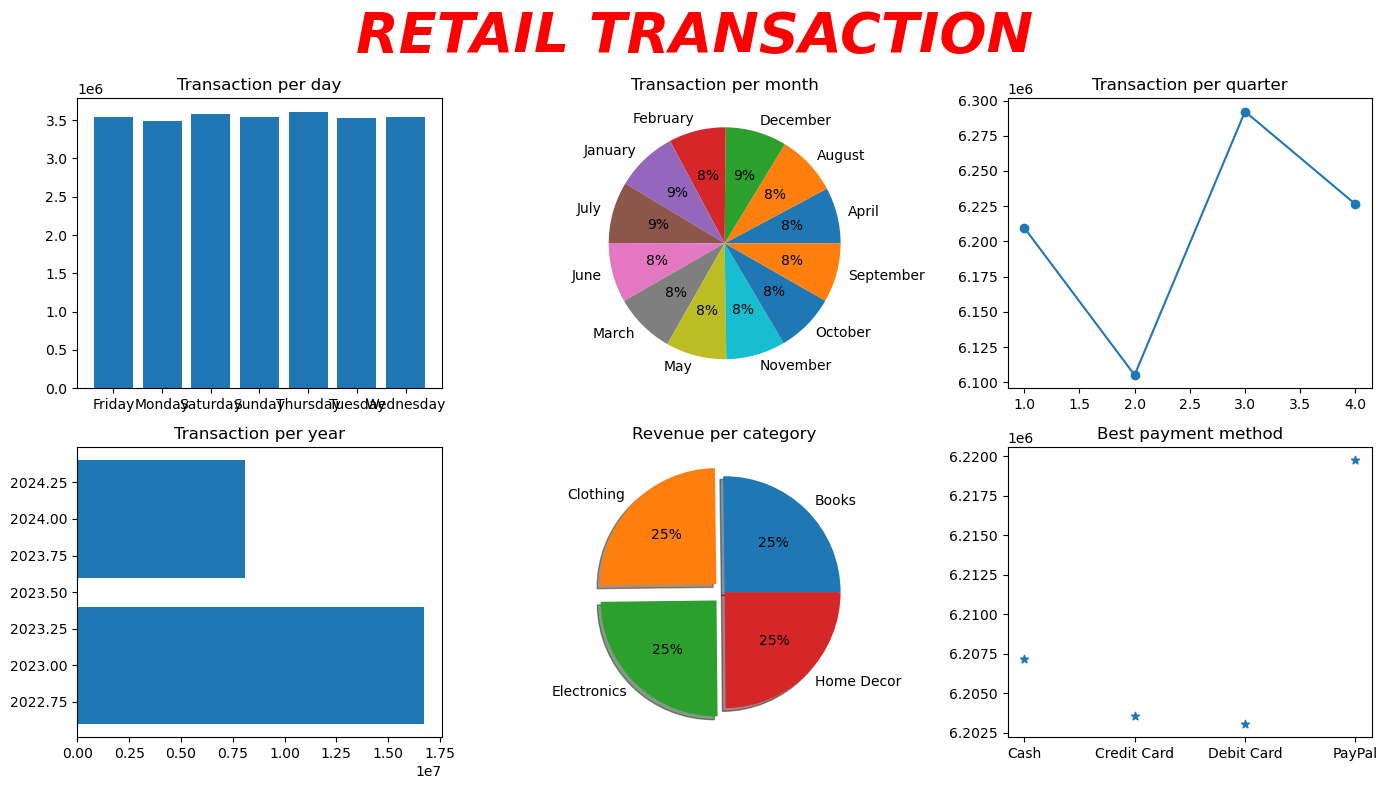

In [65]:
fig,Retails=plt.subplots(nrows=2,ncols=3,figsize=(14,8))
fig.suptitle("RETAIL TRANSACTION",fontsize=40,fontstyle="italic",fontweight="bold",c="r")
Retails[0,0].bar(Name,Number)
Retails[0,1].pie(Number1,labels=Name1,autopct="%1.0f%%")
Retails[0,2].plot(Name2,Number2,marker="o")
Retails[1,0].barh(Name3,Number3)
Retails[1,1].pie(Number4,labels=Name4,autopct="%1.0f%%",shadow=True,explode=[0,0.1,0.1,0])
Retails[1,2].scatter(Name5,Number5,marker="*")


Retails[0,0].set(title="Transaction per day")
Retails[0,1].set(title="Transaction per month")
Retails[0,2].set(title="Transaction per quarter")
Retails[1,0].set(title="Transaction per year")
Retails[1,1].set(title="Revenue per category")
Retails[1,2].set(title="Best payment method")

plt.tight_layout()
plt.savefig("retail trans")
plt.show()